In [2]:
#Import all the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('train_0OECtn8.csv')
raw_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [4]:
raw_data.describe(include='all')

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197,89197,89197.000000,89197.000000,89197.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Male,Student,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,52397,44638,NaN,NaN,NaN
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,NaN,NaN,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,NaN,NaN,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,NaN,NaN,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,NaN,NaN,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,NaN,NaN,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,NaN,NaN,280.000000,714.000000,4.150000


C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engagement_score', ylabel='Density'>

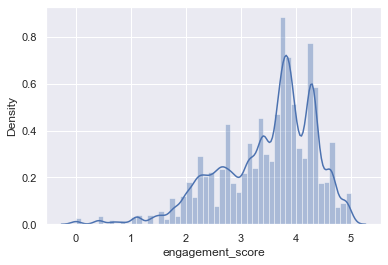

In [5]:
sns.distplot(raw_data['engagement_score'])

In [6]:
q = raw_data['engagement_score'].quantile(0.05)
data_1 = raw_data[raw_data['engagement_score']>q]
data_1.describe(include='all')

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
count,84294.000000,84294.000000,84294.000000,84294.000000,84294.000000,84294,84294,84294.000000,84294.000000,84294.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Male,Student,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,51420,43462,NaN,NaN,NaN
mean,44600.369433,13884.132275,18.094087,77.316132,24.625311,NaN,NaN,252.420932,499.121207,3.606644
std,25750.552187,8003.438237,11.632893,48.600656,8.900943,NaN,NaN,46.098576,268.087691,0.717512
min,1.000000,1.000000,1.000000,1.000000,10.000000,NaN,NaN,160.000000,30.000000,2.010000
25%,22308.250000,6957.250000,8.000000,34.000000,18.000000,NaN,NaN,230.000000,229.000000,3.130000
50%,44573.500000,13891.000000,16.000000,75.000000,23.000000,NaN,NaN,240.000000,467.000000,3.760000
75%,66915.750000,20813.000000,26.000000,119.000000,31.000000,NaN,NaN,280.000000,709.000000,4.200000


C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engagement_score', ylabel='Density'>

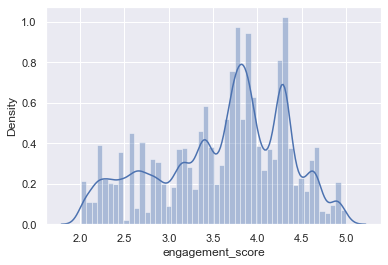

In [7]:
sns.distplot(data_1['engagement_score'])

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='followers', ylabel='Density'>

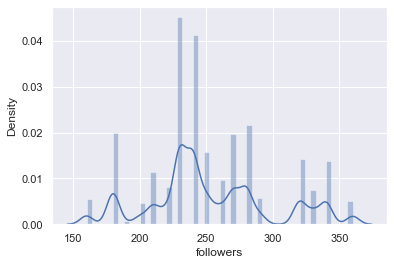

In [8]:
sns.distplot(data_1['followers'])

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

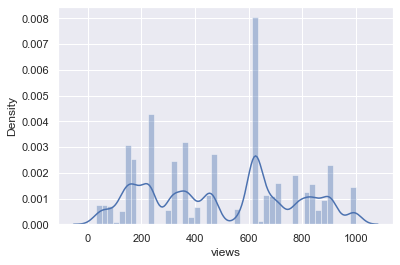

In [9]:
sns.distplot(data_1['views'])

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

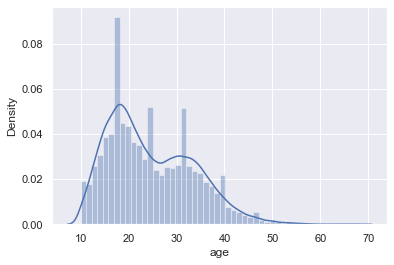

In [10]:
sns.distplot(data_1['age'])

In [11]:
q2 = data_1['age'].quantile(0.99)
data_2 = data_1[data_1['age']<q2]
data_2.describe(include ='all')

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
count,83228.000000,83228.000000,83228.000000,83228.000000,83228.000000,83228,83228,83228.000000,83228.000000,83228.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Male,Student,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,50825,43462,NaN,NaN,NaN
mean,44603.714844,13879.798469,18.089381,77.340210,24.293014,NaN,NaN,252.422502,498.940068,3.610774
std,25751.633566,8001.396790,11.635820,48.600669,8.445192,NaN,NaN,46.079291,268.081200,0.717886
min,1.000000,1.000000,1.000000,1.000000,10.000000,NaN,NaN,160.000000,30.000000,2.010000
25%,22301.750000,6950.750000,8.000000,34.000000,17.000000,NaN,NaN,230.000000,229.000000,3.130000
50%,44580.500000,13879.000000,16.000000,75.000000,23.000000,NaN,NaN,240.000000,467.000000,3.770000
75%,66918.250000,20803.000000,26.000000,119.250000,31.000000,NaN,NaN,280.000000,689.000000,4.210000


C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

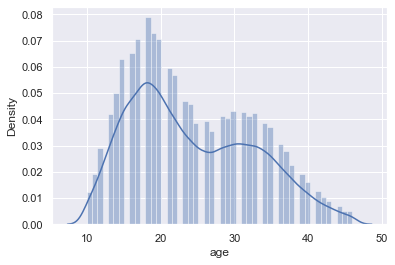

In [12]:
sns.distplot(data_2['age'])

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='category_id', ylabel='Density'>

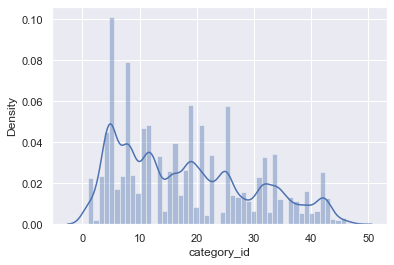

In [13]:
sns.distplot(data_2['category_id'])

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='user_id', ylabel='Density'>

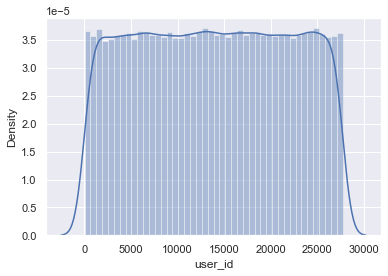

In [14]:
sns.distplot(data_2['user_id'])

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='video_id', ylabel='Density'>

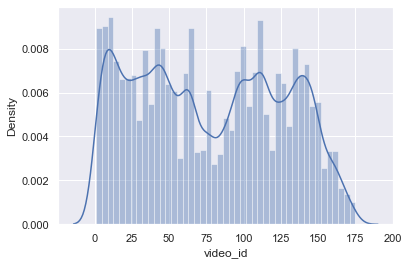

In [15]:
sns.distplot(data_2['video_id'])

In [16]:
data_cleaned = data_2.reset_index(drop=True)
data_cleaned.describe(include ='all')

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
count,83228.000000,83228.000000,83228.000000,83228.000000,83228.000000,83228,83228,83228.000000,83228.000000,83228.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Male,Student,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,50825,43462,NaN,NaN,NaN
mean,44603.714844,13879.798469,18.089381,77.340210,24.293014,NaN,NaN,252.422502,498.940068,3.610774
std,25751.633566,8001.396790,11.635820,48.600669,8.445192,NaN,NaN,46.079291,268.081200,0.717886
min,1.000000,1.000000,1.000000,1.000000,10.000000,NaN,NaN,160.000000,30.000000,2.010000
25%,22301.750000,6950.750000,8.000000,34.000000,17.000000,NaN,NaN,230.000000,229.000000,3.130000
50%,44580.500000,13879.000000,16.000000,75.000000,23.000000,NaN,NaN,240.000000,467.000000,3.770000
75%,66918.250000,20803.000000,26.000000,119.250000,31.000000,NaN,NaN,280.000000,689.000000,4.210000


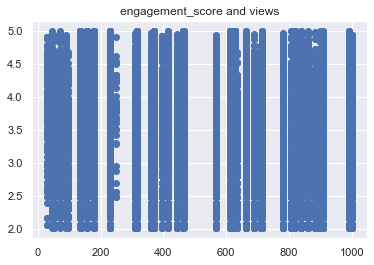

In [17]:
plt.scatter(data_cleaned['views'],data_cleaned['engagement_score'])
plt.title('engagement_score and views')
plt.show()

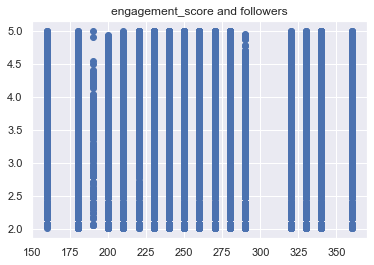

In [18]:
plt.scatter(data_cleaned['followers'],data_cleaned['engagement_score'])
plt.title('engagement_score and followers')
plt.show()

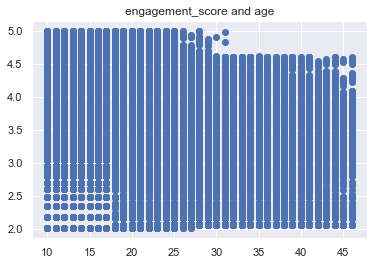

In [19]:
plt.scatter(data_cleaned['age'],data_cleaned['engagement_score'])
plt.title('engagement_score and age')
plt.show()

In [20]:
data_ready = data_cleaned.drop(['engagement_score'],axis=1)

In [21]:
data_ready.columns.values

array(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views'], dtype=object)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['row_id', 'user_id', 'category_id', 'video_id', 'age', 
        'followers', 'views']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.735775,row_id
1,3.746721,user_id
2,4.915616,category_id
3,5.183376,video_id
4,7.648687,age
5,17.058250,followers
6,5.258660,views


In [23]:
data_no_multicollinearity = data_cleaned.drop(['followers'],axis=1)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_no_multicollinearity[['row_id', 'user_id', 'category_id', 'video_id', 'age', 
         'views']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.435609,row_id
1,3.454173,user_id
2,4.887349,category_id
3,4.883350,video_id
4,5.737286,age
5,3.828477,views


In [25]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [26]:
data_with_dummies.head()

,row_id,user_id,category_id,video_id,age,views,engagement_score,gender_Male,profession_Student,profession_Working Professional
0,1,19990,37,128,24,1000,4.33,1,1,0
1,3,1840,12,24,19,138,4.35,1,1,0
2,4,12597,23,112,19,613,3.77,1,1,0
3,5,13626,23,112,27,613,3.13,1,0,1
4,6,9323,25,139,35,317,3.33,1,0,0


In [27]:
data_preprocessed = data_with_dummies
data_preprocessed.head()

,row_id,user_id,category_id,video_id,age,views,engagement_score,gender_Male,profession_Student,profession_Working Professional
0,1,19990,37,128,24,1000,4.33,1,1,0
1,3,1840,12,24,19,138,4.35,1,1,0
2,4,12597,23,112,19,613,3.77,1,1,0
3,5,13626,23,112,27,613,3.13,1,0,1
4,6,9323,25,139,35,317,3.33,1,0,0


In [28]:
data_preprocessed.columns.values

array(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'views',
       'engagement_score', 'gender_Male', 'profession_Student',
       'profession_Working Professional'], dtype=object)

In [29]:
variables2 = data_preprocessed[['row_id', 'user_id', 'category_id', 'video_id', 'age', 'views',
        'gender_Male', 'profession_Student',
       'profession_Working Professional']]
#variables2 = variables2.drop(['Registration_yes'] , axis =1)
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif2["Features"] = variables2.columns
vif2

,VIF,Features
0,3.783988,row_id
1,3.783393,user_id
2,4.953375,category_id
3,5.029470,video_id
4,8.045221,age
5,4.256688,views
6,2.495695,gender_Male
7,2.790413,profession_Student
8,1.540862,profession_Working Professional


In [ ]:
targets = data_preprocessed['engagement_score']
targets.to_csv('target.csv', index = False)
data_preprocessed.to_csv('data_preprocessed.csv', index = False)
data_preprocessed

In [65]:
inputs = data_preprocessed.drop(['engagement_score'],axis=1)
inputs.to_csv('inputs.csv', index = False)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [64]:
inputs_scaled = scaler.transform(inputs)


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(x_train,y_train)

LinearRegression()

In [37]:
y_hat = reg.predict(x_train)

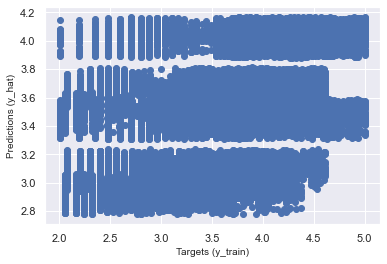

In [38]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)

plt.show()

C:\Users\91986\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engagement_score', ylabel='Density'>

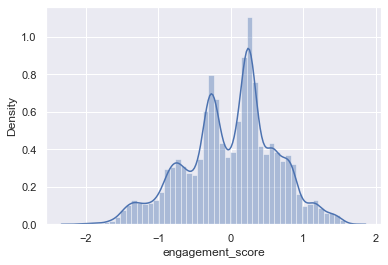

In [39]:
sns.distplot(y_train - y_hat)

In [40]:
reg.score(x_train,y_train)

0.24572486995651688

In [41]:
y_hat_test = reg.predict(x_test)

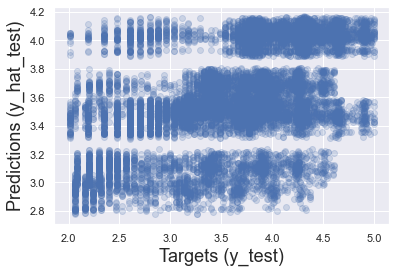

In [42]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [43]:
raw_test = pd.read_csv('test_1zqHu22.csv')

In [67]:
submission_test = raw_test.drop(['followers'],axis=1)
submission_with_dummies = pd.get_dummies(submission_test, drop_first=True)
submission_with_dummies.to_csv('submission_with_dummies.csv', index = False)

In [45]:
scaler2 = StandardScaler()
scaler2.fit(submission_with_dummies)

StandardScaler()

In [66]:
subt_inputs_scaled = scaler.transform(submission_with_dummies)
subt_inputs_scaled.to_csv('subt_inputs_scaled.csv', index = False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [47]:
submission = pd.DataFrame()

In [48]:
prediction_subt = reg.predict(subt_inputs_scaled)

In [49]:
submission['row_id'] = submission_with_dummies['row_id'].astype(int)
submission['engagement_score'] = prediction_subt

In [50]:
submission

,row_id,engagement_score
0,89198,4.091827
1,89199,3.921082
2,89200,2.972489
3,89201,4.061999
4,89202,2.996085
...,...,...
11116,100314,4.042292
11117,100315,3.488633
11118,100316,4.052272
11119,100317,3.681067


In [51]:
submission.to_csv('submission.csv', index = False)